Problem statement: https://ovgu-ailab.github.io/lgm2021/ass1.html

In [ ]:
import numpy as np

In [ ]:
rng = np.random.default_rng(3)

In [ ]:
#Take a “population sample” of a specific size (experiment with different sizes!) 
#where every “generated person” has 1% chance of turning out sick.
population = rng.choice(['H','S'],size=10000,p=[0.99,0.01])
population[:20]

array(['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H'], dtype='<U1')

In [ ]:
vals , freq = np.unique(population,return_counts=True)

In [ ]:
vals,freq

(array(['H', 'S'], dtype='<U1'), array([9907,   93]))

In [ ]:
sum(freq)

10000

In [ ]:
actual_sick = sum(population == 'S')
actual_healthy = sum(population == 'H')
actual_sick , actual_healthy

(93, 9907)

In [ ]:
prob_s = sum(population == 'S') / sum(freq)
prob_s

0.0093

In [ ]:
prob_h = sum(population == 'H') / sum(freq)
prob_h

0.9907

In [ ]:
#Test your “people” – if they are sick, the test should have a 99.9% chance of 
#returning a positive result; if they are healthy, it should be 1%.
positive = list()
negative = list()
for p in population:
  if p == 'S':
    positive.append(rng.choice(['+','-'],p=[0.999,0.001]))
  else:
    negative.append(rng.choice(['+','-'],p=[0.01,0.99]))


In [ ]:
v , f = np.unique(positive,return_counts=True)
v , f

(array(['+'], dtype='<U1'), array([93]))

In [ ]:
sum(np.array(positive) == '+')

93

In [ ]:
v1 , f1 = np.unique(negative,return_counts=True)
v1 , f1 

(array(['+', '-'], dtype='<U1'), array([ 107, 9800]))

In [ ]:
sum(f1)

9907

In [ ]:
# Out of all people that have been tested sick, get the proportion of people that is actually sick.
tested_sick = sum(np.array(positive) == '+') + sum(np.array(negative) == '+')
tested_sick

200

In [ ]:
prop_actual_sick = actual_sick / tested_sick
prop_actual_sick

0.465

In [ ]:
import scipy as sp
#from scipy.stats import norm,multivariate_normal

In [ ]:
mu_a = 1
mu_b = -1
cov_matrix = np.array([[2,0],[0,2]])
cov_matrix

array([[2, 0],
       [0, 2]])

In [ ]:
x = sp.stats.multivariate_normal(mean=[mu_a, mu_b],cov=cov_matrix)

In [ ]:
x.pdf(2)

0.0065321166423424545

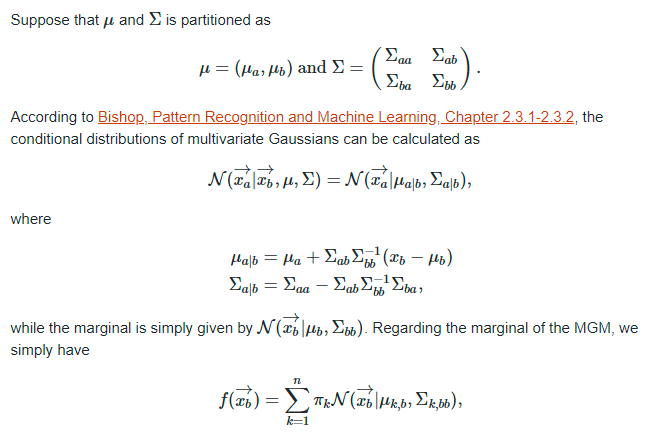

In [ ]:
cov_matrix,mu_a,mu_b

(array([[2, 0],
        [0, 2]]), 1, -1)

In [ ]:
cov_matrix = np.array([[1,0],[0,1]])
mu_a = 1
mu_b = -1
cov_matrix

array([[1, 0],
       [0, 1]])

In [ ]:
def get_mu_sigma(mu_a,b,mu_b,cov_matrix):
  mu_a_g_b = mu_a + (cov_matrix[0][1]*(b - mu_b))/cov_matrix[1][1]
  sigma_a_g_b = cov_matrix[0][0] - (cov_matrix[0][1] / cov_matrix[1][1]) * cov_matrix[1][0]

  return mu_a_g_b,sigma_a_g_b 

In [ ]:
#sp.stats.multivariate_normal()
# p(x1 = 0.5 | x2 = -0.3)
mu_a_g_b,sigma_a_g_b = get_mu_sigma(mu_a,-0.3,mu_b,cov_matrix)
print(mu_a_g_b,sigma_a_g_b)

nor_dist = sp.stats.norm(loc=mu_a_g_b,scale=sigma_a_g_b)
print(nor_dist.pdf(0.5))
# P()
#np.random.multivariate_normal()

1.0 1.0
0.3520653267642995


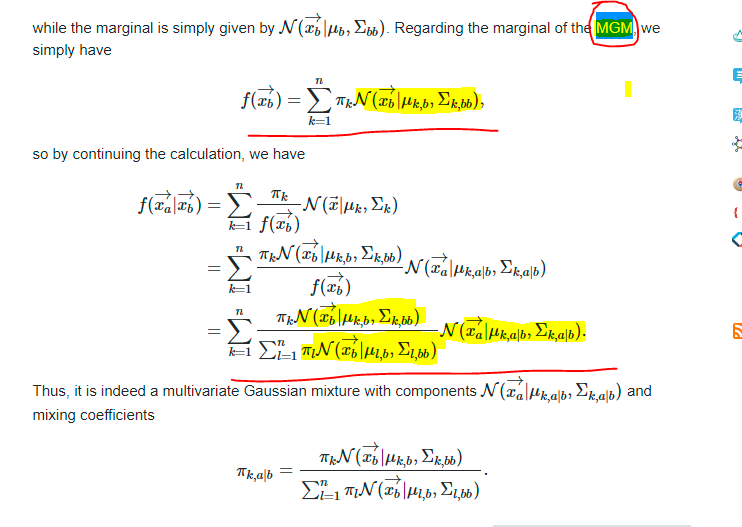

In [ ]:
def numerator(mu_a,mu_b,a,b,cov_matrix,pi):
  sum = 0
  for idx in range(len(mu_b)):
    norm_dist_b = sp.stats.norm(loc=mu_b[idx],scale=cov_matrix[1][1])
    val_1 = norm_dist_b.pdf(b)
    mu_a_g_b,sigma_a_g_b = get_mu_sigma(mu_a[idx],b,mu_b[idx],cov_matrix)
    norm_dist_a = sp.stats.norm(loc=mu_a_g_b,scale=sigma_a_g_b)
    val_2 = norm_dist_a.pdf(a)
    print("val_2: ",val_2)
    sum += pi * val_1 * val_2
  
  return sum

In [ ]:
def denominator(mu_b,b,cov_matrix,pi):
  sum = 0
  #sl = list()
  #print("len(mu_b): ", len(mu_b))
  for idx in range(len(mu_b)):
    norm_dist_b = sp.stats.norm(loc=mu_b[idx],scale=cov_matrix[1][1])
    val_1 = norm_dist_b.pdf(b)
    #print("val_1: ",val_1)
    sum += pi * val_1
    #sl.append(pi * val_1)
  #print("sum: ",sum)
  #print(sl)
  return sum




In [ ]:
#Assume the first mixture component has mu_a = (1, 1) and the second one has mu_b = (-1, -1).
#Both components have sigma = 0.5. The prior mixture weights are 0.5, i.e. both components are weighted equally.
# p(x1 = 0.5 | x2 = -0.3)
def MGM(mu_a,mu_b,a,b,cov_matrix,pi):
  numerator_equ = numerator(mu_a,mu_b,a,b,cov_matrix,pi)
  print("numerator: ",numerator_equ)
  denominator_equ = denominator(mu_b,b,cov_matrix,pi)
  #print("denominator: ",denominator_equ)

  return numerator_equ / denominator_equ

In [ ]:
mu_a = (1,1)
mu_b = (-1,-1)
a = 0.5
b = -0.3
pi = 0.5
cov_matrix = np.array([[0.5,0],[0,0.5]])
prob_a_g_b = MGM(mu_a,mu_b,a,b,cov_matrix,pi)
print(prob_a_g_b)

val_2:  0.48394144903828673
val_2:  0.48394144903828673
numerator:  0.1449186533611853
0.48394144903828673


In [ ]:
cov_matrix[0,1]

0.0

In [ ]:
sp.stats.norm(-1,0.5).pdf(-0.3)

0.29945493127148975

In [ ]:
a = 1.5
b = -0.3
prob_a_g_b = MGM(mu_a,mu_b,a,b,cov_matrix,pi)
prob_a_g_b

val_2:  0.48394144903828673
val_2:  0.48394144903828673
numerator:  0.1449186533611853


0.48394144903828673

In [ ]:
a = -0.5
b = -0.3
prob_a_g_b = MGM(mu_a,mu_b,a,b,cov_matrix,pi)
prob_a_g_b

val_2:  0.008863696823876015
val_2:  0.008863696823876015
numerator:  0.0026542777232051143


0.008863696823876015

Consider the general case, where you have a model p(x) and want to find the conditional distribution of some subset of variables given the remaining ones. Why is this difficult (often impossible) to compute?

Answer: Ref: NPTEL Lecture  (https://www.youtube.com/watch?v=JpC2Eq6vnns&list=PL3pGy4HtqwD2kwldm81pszxZDJANK3uGV&index=122 [link text](https://))

Computational: Expensive to manupulate and too large to store.

Cognative: Impossible to acquire so many numbers from human.

statistical: Require huge amount of data to learn the parameters.